In [2]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import numpy as np

In [12]:
class FunLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size 
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hs):
        out, hs = self.lstm(x, hs)
        out = out.view(-1, self.hidden_size)
        out = self.fc(out)
        return out, hs

In [13]:
input_size = 1
hidden_size = 8
num_layers = 1
output_size = 1

model = FunLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr = 0.001)

x = np.linspace(-10, 10, 32*512)
y = x ** 2

for i in range(0, 100):
    hs = None

    indices = np.random.randint(0, 32*512, 32)
    xb = x[indices]
    yb = y[indices]
    xt = torch.FloatTensor(xb)
    yt = torch.FloatTensor(yb)
    yt = yt.reshape(32, 1)

    xt = xt.reshape(1, 32, 1)
    out, hs = model(xt, hs)
    hs = tuple([h.data for h in hs])

    loss = criterion(out, yt)
    loss.backward()
    opt.step()


In [20]:
x = np.linspace(-1, 1, 32)
x_t = torch.FloatTensor(x)
x_t = x_t.reshape(32, 1, 1)

print(x_t)

with torch.no_grad():
    y_o, hs = model(x_t, None)


print(y_o)

tensor([[[-1.0000]],

        [[-0.9355]],

        [[-0.8710]],

        [[-0.8065]],

        [[-0.7419]],

        [[-0.6774]],

        [[-0.6129]],

        [[-0.5484]],

        [[-0.4839]],

        [[-0.4194]],

        [[-0.3548]],

        [[-0.2903]],

        [[-0.2258]],

        [[-0.1613]],

        [[-0.0968]],

        [[-0.0323]],

        [[ 0.0323]],

        [[ 0.0968]],

        [[ 0.1613]],

        [[ 0.2258]],

        [[ 0.2903]],

        [[ 0.3548]],

        [[ 0.4194]],

        [[ 0.4839]],

        [[ 0.5484]],

        [[ 0.6129]],

        [[ 0.6774]],

        [[ 0.7419]],

        [[ 0.8065]],

        [[ 0.8710]],

        [[ 0.9355]],

        [[ 1.0000]]])
tensor([[0.2949],
        [0.2949],
        [0.2949],
        [0.2950],
        [0.2951],
        [0.2953],
        [0.2955],
        [0.2958],
        [0.2961],
        [0.2965],
        [0.2969],
        [0.2974],
        [0.2979],
        [0.2985],
        [0.2991],
        [0.2998],
        

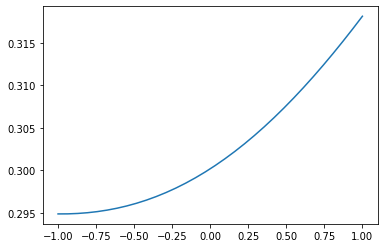

In [25]:
import matplotlib.pyplot as plt 

y_o = y_o.reshape(32)

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(x, y_o)

plt.show()

# 뭘 배운 거지? 